# Model optimisation
## Purpose
Because several of the model used in the analysis (see `credit_risk_classification.ipynb`) take several parameters that can influence their performance, this notebook is used to optimise these parameters. The best performing version in then used in the main analysis.

## Preparation

In [16]:
# Ignore all warnings
from warnings import simplefilter
simplefilter(action='ignore')

# Import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

# Import the models from SKLearn (Model 1 through Model 6)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Local module
from ml_classification import model_performance

# Read the CSV file from the Resources folder into a Pandas DataFrame
csv = Path('Resources/lending_data.csv')
df = pd.read_csv(csv)

# Separate the data into labels and features
# Separate the y variable, the labels
y = df['loan_status']

# Separate the X variable, the features
X = df.drop(columns='loan_status')

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,stratify=y)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimisation of Model 4 (`DecisionTreeClassifier`)
### Analysis
`DecisionTreeClassifier` takes the maximum depth as a parameter. A max_depth parameter between 1 and 10 is tested. The main metric we look at is the Class-1 Recall to make sure that as few risky loans as possible are classified as risky (limit risks for the lender.) 


In [13]:
# Test max depth between 1 and 11
depths = list(range(1,11))

# Create empty list to save results
metrics = []

for depth in depths:

    # Creating the decision tree classifier instance
    model_4 = DecisionTreeClassifier(max_depth=depth)

    # Fitting the model
    model_4 = model_4.fit(X_train_scaled, y_train)

    # Making predictions using the testing data
    predictions_4 = model_4.predict(X_test_scaled)

    # Model performance (do not print the output)
    model_4_metrics = model_performance(y_test, predictions_4, False)

    # Add an element to store the max depth
    model_4_metrics['max_depth'] = depth

    # Add the dictionary to the metrics list
    metrics.append(model_4_metrics)

# Save the metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Reorder the colunms
metrics_df = metrics_df[['max_depth', 'accuracy', 'precision_0', 'precision_1', 'recall_0', 'recall_1']]
metrics_df.sort_values('recall_1', ascending=False)

,max_depth,accuracy,precision_0,precision_1,recall_0,recall_1
2,3,0.995202,0.999839,0.873596,0.995202,0.9952
0,1,0.995099,0.999732,0.873239,0.995202,0.9920
1,2,0.995099,0.999732,0.873239,0.995202,0.9920
3,4,0.995047,0.999732,0.872011,0.995149,0.9920
4,5,0.995047,0.999679,0.873061,0.995202,0.9904
5,6,0.994944,0.999572,0.872702,0.995202,0.9872
6,7,0.994944,0.999518,0.873759,0.995256,0.9856
7,8,0.994841,0.999465,0.872340,0.995202,0.9840
8,9,0.994944,0.999465,0.874822,0.995309,0.9840
9,10,0.994480,0.998983,0.873199,0.995309,0.9696


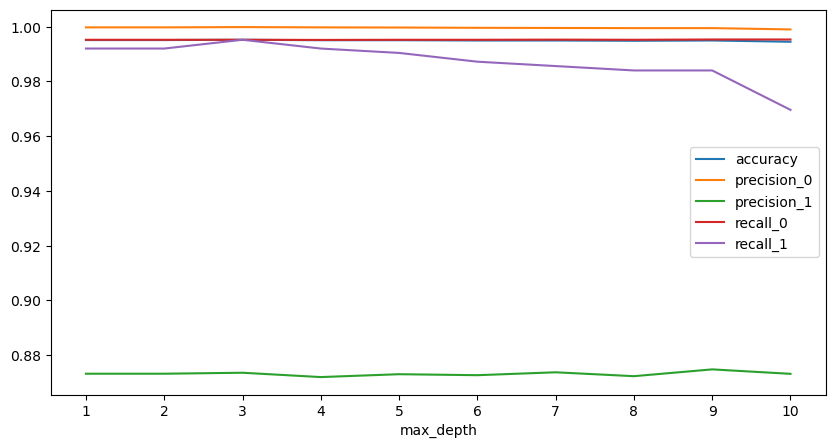

In [19]:
metrics_df.plot.line(x = 'max_depth', figsize = (10,5))
plt.xticks(depths)
plt.show()

### Conclusion
A maximum depth of `3` provides the maximum Class-1 recall and all the parameters are in acceptable range. This parameter is therefore used in the main analysis. 